## Comparison between clusters

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
import helpers
%load_ext autoreload
%autoreload 2

save=False

We first have a look at the average values in each cluster

In [2]:
name_model = "KMeans"
metric = "l2"
n_clusters = 4
cluster_dim = 5
preprocessing = "LogMinMax"
weighting_name = None  # Change here the weighting ["economic","vuln","energie"]
if weighting_name is None:
    weighting_name = "None"

# Load the classification index
cluster_index_ = pd.read_csv(
    os.path.join(
        "../clusters",
        f"{preprocessing}_{cluster_dim}_{name_model}_{metric}_{n_clusters}_no_airport_conso_weighting_{weighting_name}.csv",
    )
)
# Load Feature matrix
aggregated_by_GRD = pd.read_csv(os.path.join("../data", f"aggregated_by_GRD.csv"),index_col=0)


classified = pd.merge(
    cluster_index_, aggregated_by_GRD, left_on="Name", right_index=True
)
np.round(classified.groupby("cluster_index").mean().T, 4)


/var/folders/rw/qcr1zxbs5rz8z69lz349s8cc0000gp/T/ipykernel_44910/2594760283.py:24: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  np.round(classified.groupby("cluster_index").mean().T, 4)


cluster_index,0,1,2,3
Population - Habitants,1359.3647,2613.0545,12218.6011,160537.8718
"Surface - Surface, total",91.8780,12.7487,56.4660,607.9815
"Economie - Emplois, total",718.7765,1082.4836,7226.0532,104390.2564
train_station,0.9176,0.3345,2.3830,20.9744
bank,1.0824,0.5745,3.9362,37.5897
hospital,0.1176,0.0436,0.9787,11.4872
prod_plant_50MW,10587.5967,2528.2665,12417.2696,117825.1433
official_gov,0.0471,0.0327,0.2074,7.0000
consumption,2664.7802,3225.6555,10145.3425,126114.3898
supermarket,1.2706,0.9855,6.4362,69.1795


We can also have a look at the distribution of the features in each cluster.

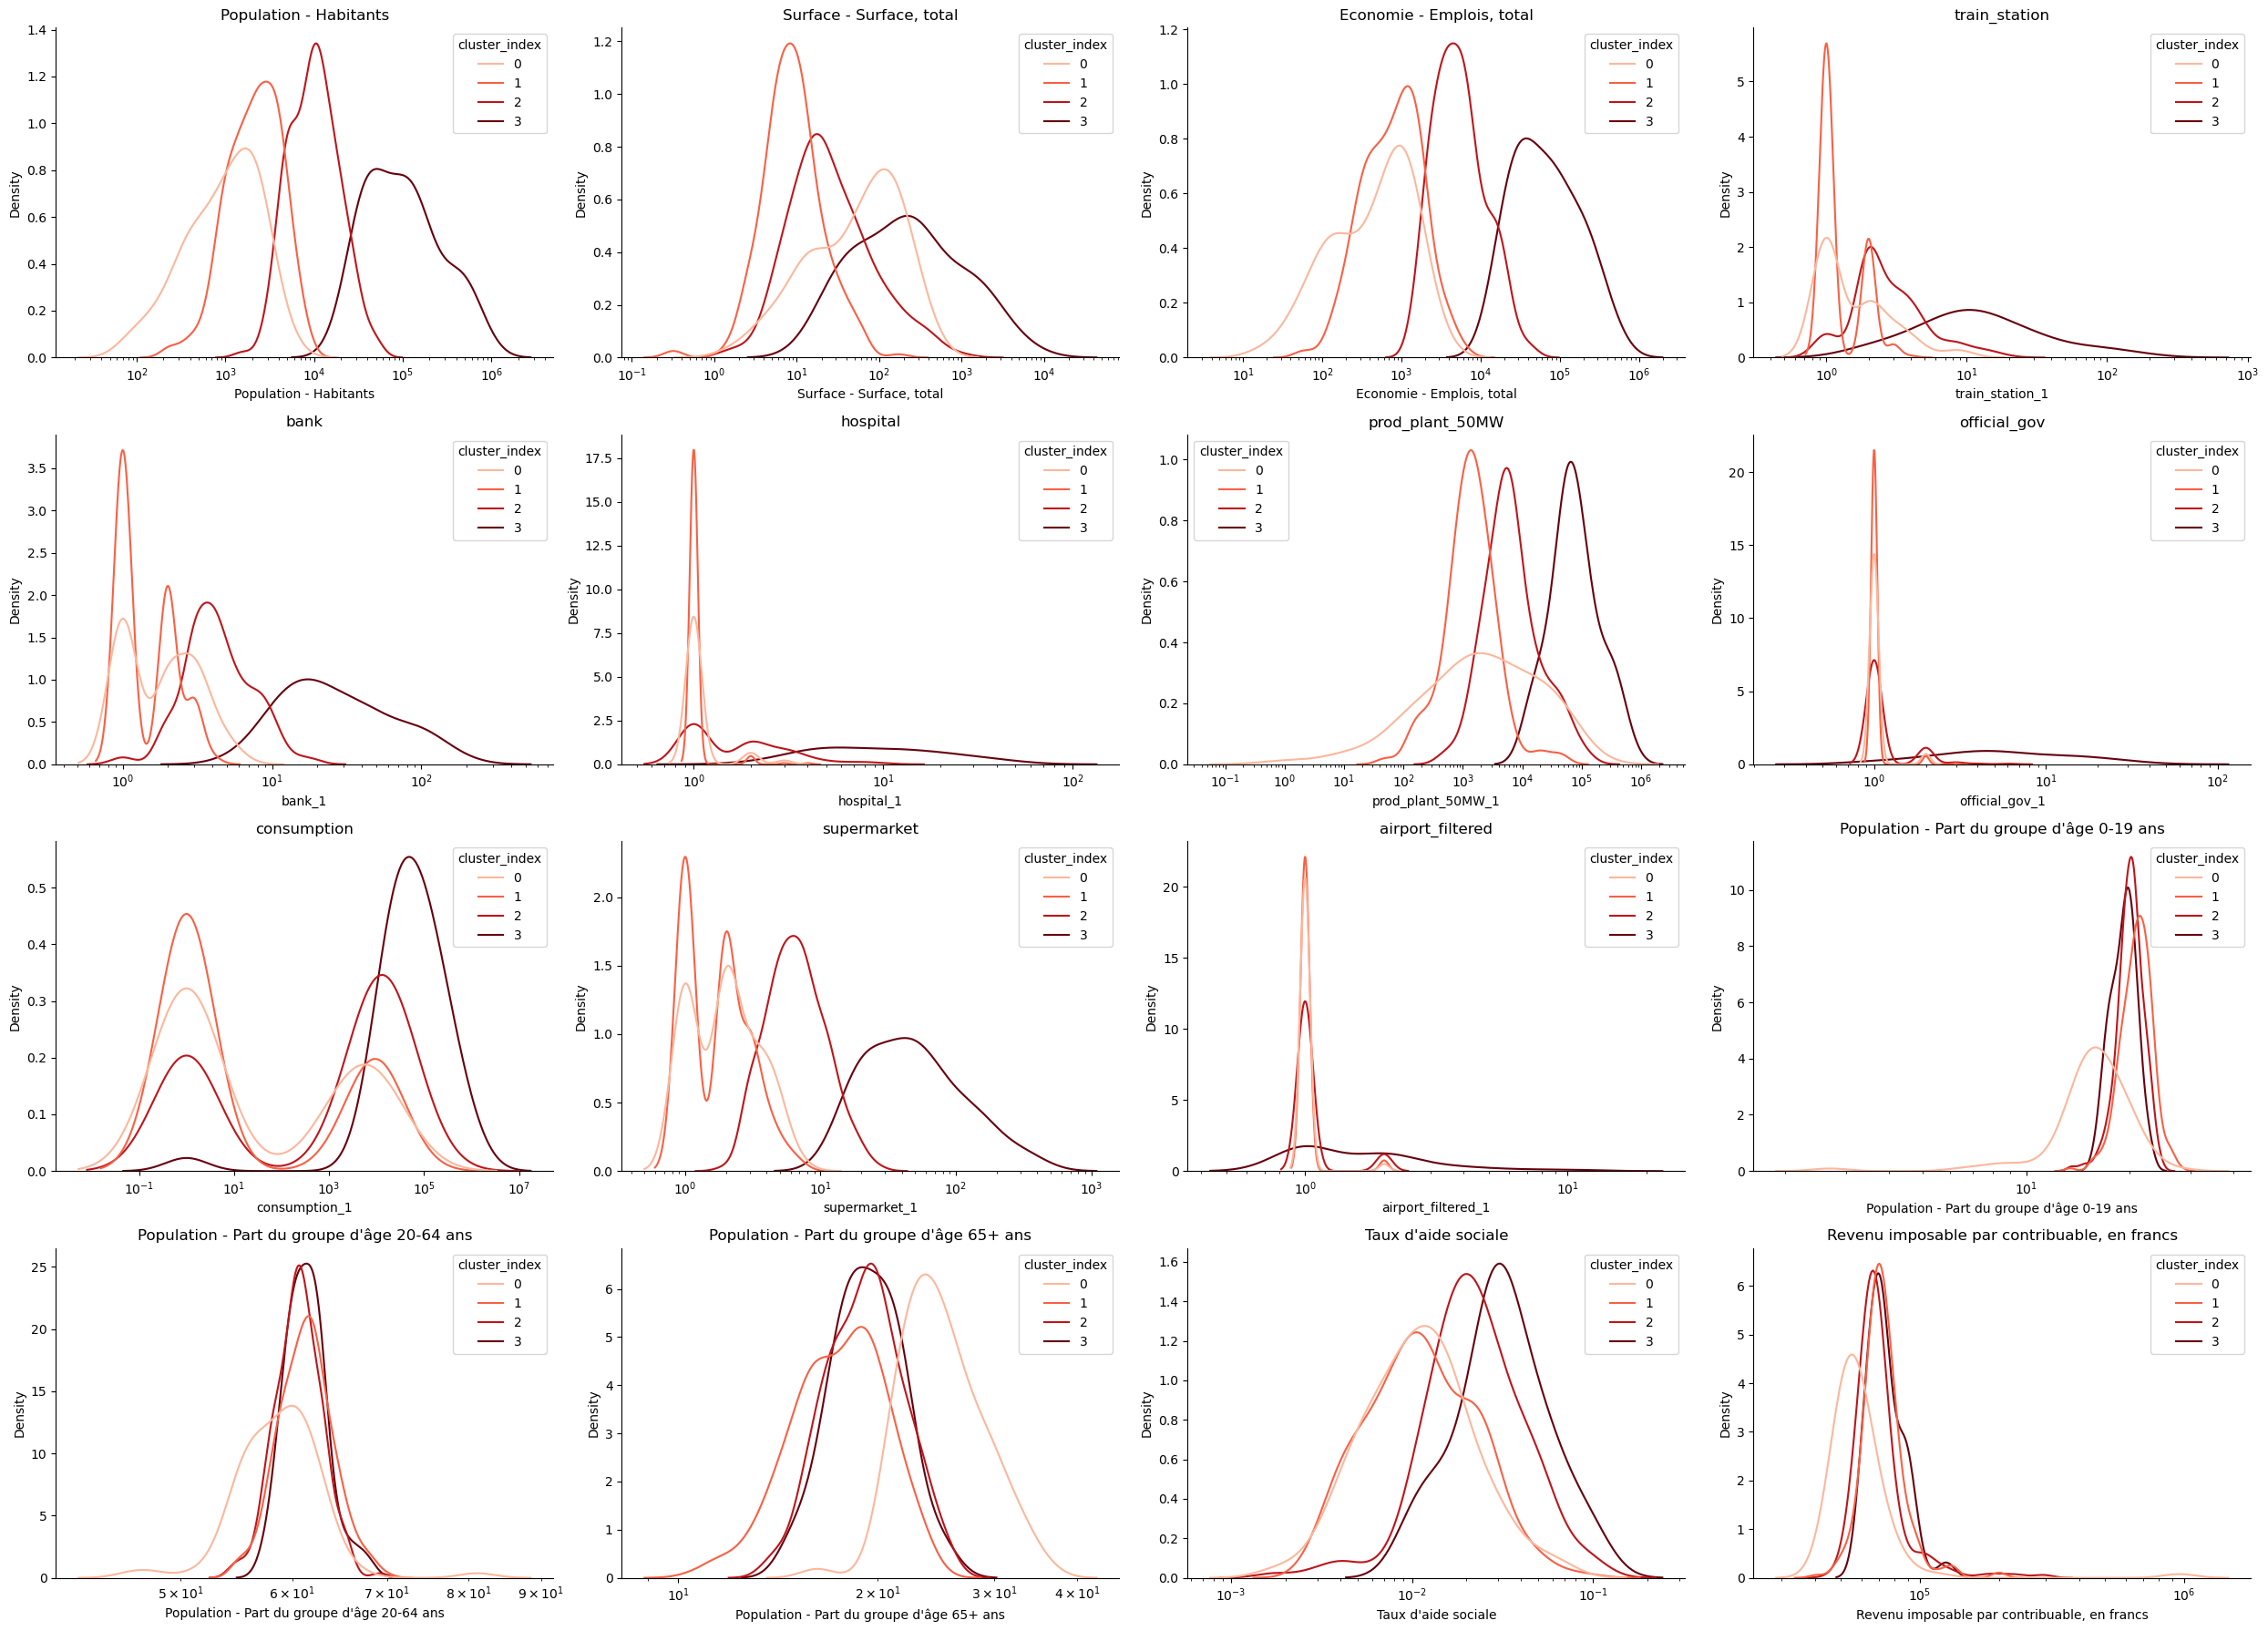

In [3]:
filename = f"hist_{preprocessing}_{cluster_dim}_{name_model}_{metric}_{n_clusters}_no_airport_conso_weighting_{weighting_name}"
fig = helpers.plot_kdeplot(classified, save=save, filename=filename)


Here we compare two clusters. We first load two clustering index. In what follows, cluster_index_x corresponds to the "cluster_index_1" file and cluster_index_y corresponds to the "cluster_index_2" file. 

In [4]:
# only pop
cluster_index_1 = pd.read_csv(
    os.path.join("../clusters", "SFOE.csv")
)  # "onlypoplog_None_None_GMM_l2_4.csv"))

cluster_index_2 = pd.read_csv(
    os.path.join(
        "../clusters", "LogMinMax_5_KMeans_l2_4_no_airport_conso_weighting_None.csv"#f"LogMinMax_5_KMeans_l2_4_no_airport_conso_weighting_{weighting_name}.csv"
    )
)
# cluster_index_2 = cluster_index_
classified_comp = pd.merge(
    classified.drop(columns="cluster_index"), cluster_index_1, on="Name"
)
classified_comp = pd.merge(classified_comp, cluster_index_2, on="Name")
save = False
classified_comp


,Name,Population - Habitants,"Surface - Surface, total","Economie - Emplois, total",train_station,bank,hospital,prod_plant_50MW,official_gov,consumption,supermarket,airport_filtered,Population - Part du groupe d'âge 0-19 ans,Population - Part du groupe d'âge 20-64 ans,Population - Part du groupe d'âge 65+ ans,Taux d'aide sociale,"Revenu imposable par contribuable, en francs",train_station_1,cluster_index_x,cluster_index_y
0,AEW Energie AG,188220.0,503.72,81230.0,26.0,56.0,9.0,315173.80,2.0,168920.035981,76.0,1.0,19.961747,61.717140,18.321114,0.019078,76790.204338,27.0,3,3
1,AG Elektrizitätswerk Maienfeld,3006.0,32.33,1909.0,0.0,1.0,0.0,3127.23,1.0,0.000000,1.0,0.0,18.429807,62.341983,19.228210,0.004325,83135.457627,1.0,0,1
2,AMS Aziende Municipalizzate Stabio,4510.0,6.15,6361.0,0.0,2.0,0.0,3503.31,0.0,7725.276924,2.0,0.0,20.509978,59.578714,19.911308,0.027938,67695.529801,1.0,0,1
3,Aare Versorgungs AG,48284.0,98.21,18092.0,7.0,9.0,0.0,13830.41,1.0,43062.687008,17.0,0.0,19.573772,60.910447,19.515782,0.042202,66423.878137,8.0,2,2
4,Acqua Gas Elettricità SA Chiasso,18929.0,11.78,17517.0,2.0,12.0,1.0,10370.30,1.0,14957.581884,14.0,0.0,17.032067,57.715674,25.252258,0.051455,66463.821892,3.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,eug Elektra Untergäu,10828.0,25.73,4427.0,1.0,3.0,0.0,49887.71,1.0,9254.536449,6.0,0.0,20.502401,61.738086,17.759512,0.029553,71895.690004,2.0,1,2
583,ewl Kabelnetz AG,111830.0,95.70,95674.0,3.0,24.0,6.0,23903.67,4.0,57372.138524,53.0,0.0,16.910489,63.231691,19.857820,0.040758,72169.774817,4.0,3,3
584,ewz,426280.0,208.77,502189.0,31.0,86.0,42.0,90761.62,20.0,118961.650147,163.0,0.0,17.536126,67.627146,14.836727,0.044512,85411.331953,32.0,3,3
585,rwt Regionalwerk Toggenburg AG,15693.0,78.47,8297.0,2.0,4.0,1.0,24740.97,0.0,40024.274584,10.0,0.0,23.443574,60.268910,16.287517,0.025107,63474.390244,3.0,1,2


We compute the differences

In [6]:
classified_comp["diff"] = classified_comp["cluster_index_y"].astype(int) - classified_comp["cluster_index_x"].astype(int)


We then compute the transition from on cluster to another with the new classification (cluster_index_y)

In [7]:
transitions = pd.pivot_table(
    classified_comp.groupby(["cluster_index_x", "cluster_index_y"])
    .size()
    .reset_index(),
    0,
    "cluster_index_x",
    "cluster_index_y",
).fillna(0)


In [8]:
transitions

cluster_index_y,0,1,2,3
cluster_index_x,,,,
0,84.0,252.0,35.0,0.0
1,1.0,23.0,129.0,0.0
2,0.0,0.0,24.0,17.0
3,0.0,0.0,0.0,22.0


In [9]:
# In percentage
transitions.div(transitions.sum(axis=1),axis=0)

cluster_index_y,0,1,2,3
cluster_index_x,,,,
0,0.226415,0.679245,0.094340,0.000000
1,0.006536,0.150327,0.843137,0.000000
2,0.000000,0.000000,0.585366,0.414634
3,0.000000,0.000000,0.000000,1.000000


In [10]:
change_class = classified_comp["diff"].abs() > 0
print(
    "The proportion of GRDs affected is ",
    change_class.sum() / classified_comp.shape[0],
    "The population size affected is",
    classified_comp[change_class]["Population - Habitants"].sum()
    / classified_comp["Population - Habitants"].sum(),
)


The proportion of GRDs affected is  0.7393526405451448 The population size affected is 0.30781083472366993


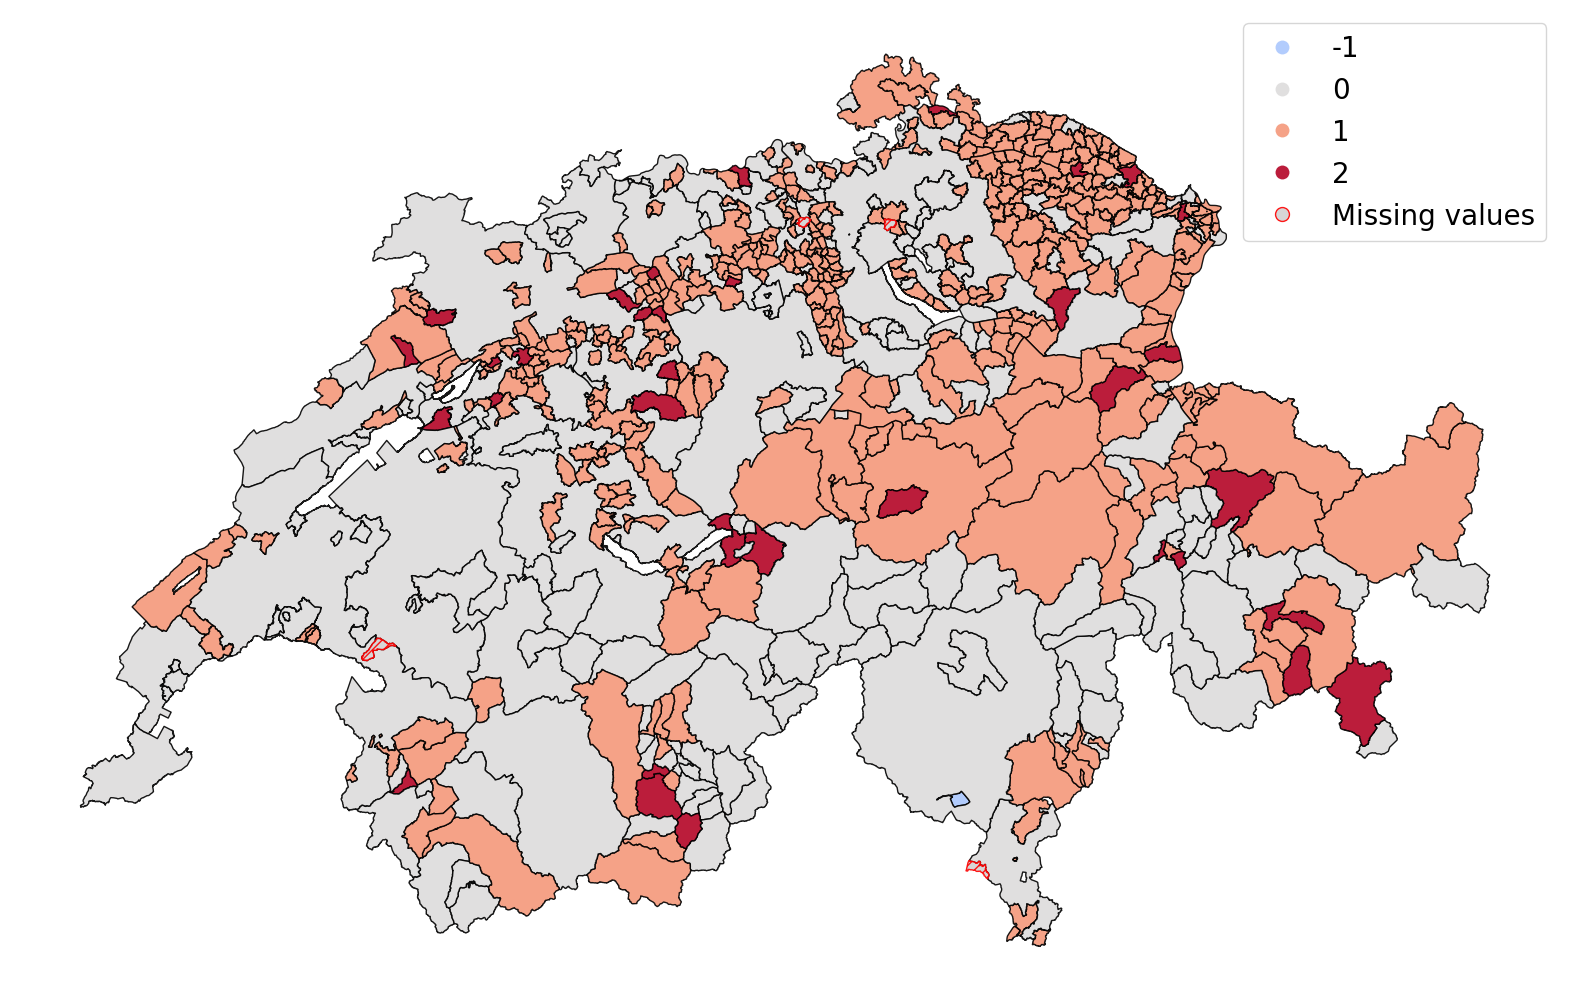

In [11]:
mapping = helpers.get_mapping()

swiss_map = helpers.map_visualization(
    mapping,
    classified_comp[["Name", "diff"]].rename(columns={"diff": "cluster_index"}),
    simplified=True,
)
missing_style = {
    "color": "lightgrey",
    "edgecolor": "red",
    "hatch": "///",
    "label": "Missing values",
}
cmap = colors.TwoSlopeNorm(vmin=-2.0, vcenter=1, vmax=3)
# you might need to adjust the vcenter
ax = swiss_map.dissolve(by="Name").plot(
    column="cluster_index",
    legend=True,
    cmap="coolwarm",
    edgecolor="black",
    figsize=(20, 15),
    alpha=0.9,
    legend_kwds={"prop": {"size": 20}},
    norm=cmap,
    missing_kwds=missing_style,
)
ax.set_axis_off()
save = False
if save:
    plt.savefig(
        os.path.join(
            "../figure",
            f"diff_poplog-red4_4_no_airport_conso_weighting_{weighting_name}.png",
        ),
        dpi=150,
    )


In [12]:
classified_comp[["Name", "diff"]].rename(columns={"diff": "cluster_index"})

,Name,cluster_index
0,AEW Energie AG,0
1,AG Elektrizitätswerk Maienfeld,1
2,AMS Aziende Municipalizzate Stabio,1
3,Aare Versorgungs AG,0
4,Acqua Gas Elettricità SA Chiasso,1
...,...,...
582,eug Elektra Untergäu,1
583,ewl Kabelnetz AG,0
584,ewz,0
585,rwt Regionalwerk Toggenburg AG,1


All clusterings

In [13]:
from functools import reduce

# only pop
cluster_index_all = [
    pd.read_csv(os.path.join("../clusters", "SFOE.csv")).rename(
        columns={"cluster_index": "SFOE classification"}
    ),
    pd.read_csv(
        os.path.join("../clusters", "onlypoplog_None_None_GMM_l2_4.csv")
    ).rename(columns={"cluster_index": "Only pop. classification"}),
]  # "onlypoplog_None_None_GMM_l2_3.csv"))

name_col = {
    "None": "All variables classification",
    "economic": "Economic sensitivity",
    "vuln": "Vulnerable pop. sensitivity",
    "energie": "Energy sensitivity",
}
for w in ["None", "economic", "vuln", "energie"]:
    cluster_index_ = pd.read_csv(
        os.path.join(
            "../clusters",
            f"LogMinMax_5_KMeans_l2_4_no_airport_conso_weighting_{w}.csv",
        )
    ).rename(columns={"cluster_index": name_col[w]})
    cluster_index_all.append(cluster_index_)


reduce_func = lambda left, right: pd.merge(
    left,
    right,
    on="Name",
)

cluster_index_all = reduce(
    reduce_func,
    cluster_index_all,
)
final_results = pd.merge(aggregated_by_GRD, cluster_index_all, on="Name").drop(
    columns=[
        "airport_filtered",
        "Population - Part du groupe d'âge 0-19 ans",
        "Population - Part du groupe d'âge 20-64 ans",
        "consumption",
    ]
)


In [14]:
columns = [
    "SFOE classification",
    "Only pop. classification",
    "All variables classification",
    "Economic sensitivity",
    "Vulnerable pop. sensitivity",
    "Energy sensitivity",
]
counts = []
for v in columns:
    counts.append(final_results[v].value_counts())

reduce_func = lambda left, right: pd.merge(
    left,
    right,
    left_index=True,
    right_index=True,
)
counts = reduce(
    reduce_func,
    counts,
)
counts

,SFOE classification,Only pop. classification,All variables classification,Economic sensitivity,Vulnerable pop. sensitivity,Energy sensitivity
0,371,142,85,207,139,166
1,153,275,275,220,304,228
2,41,143,188,123,111,156
3,22,27,39,37,33,37


Text(0, 0.5, 'Number of distribution operators')

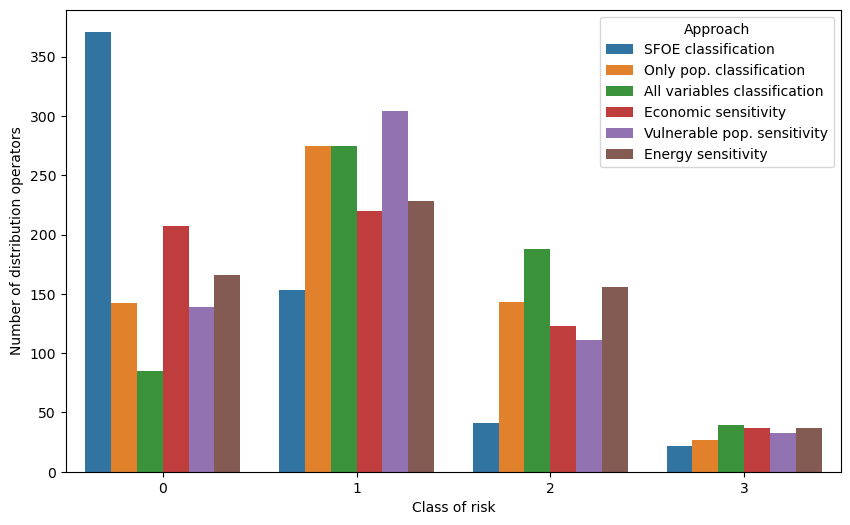

In [15]:
counts = (
    counts.reset_index().melt(id_vars="index").rename(columns={"variable": "Approach"})
)
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.barplot(data=counts, x="index", y="value", hue="Approach", ax=ax)
plt.xlabel("Class of risk")
plt.ylabel("Number of distribution operators")


In [16]:
final_results

,Name,Population - Habitants,"Surface - Surface, total","Economie - Emplois, total",train_station,bank,hospital,prod_plant_50MW,official_gov,supermarket,Population - Part du groupe d'âge 65+ ans,Taux d'aide sociale,"Revenu imposable par contribuable, en francs",SFOE classification,Only pop. classification,All variables classification,Economic sensitivity,Vulnerable pop. sensitivity,Energy sensitivity
0,AEW Energie AG,188220.0,503.72,81230.0,26.0,56.0,9.0,315173.80,2.0,76.0,18.321114,0.019078,76790.204338,3,3,3,3,3,3
1,AG Elektrizitätswerk Maienfeld,3006.0,32.33,1909.0,0.0,1.0,0.0,3127.23,1.0,1.0,19.228210,0.004325,83135.457627,0,1,1,1,1,1
2,AMS Aziende Municipalizzate Stabio,4510.0,6.15,6361.0,0.0,2.0,0.0,3503.31,0.0,2.0,19.911308,0.027938,67695.529801,0,1,1,1,1,1
3,Aare Versorgungs AG,48284.0,98.21,18092.0,7.0,9.0,0.0,13830.41,1.0,17.0,19.515782,0.042202,66423.878137,2,2,2,2,2,2
4,Acqua Gas Elettricità SA Chiasso,18929.0,11.78,17517.0,2.0,12.0,1.0,10370.30,1.0,14.0,25.252258,0.051455,66463.821892,1,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,eug Elektra Untergäu,10828.0,25.73,4427.0,1.0,3.0,0.0,49887.71,1.0,6.0,17.759512,0.029553,71895.690004,1,2,2,2,1,2
583,ewl Kabelnetz AG,111830.0,95.70,95674.0,3.0,24.0,6.0,23903.67,4.0,53.0,19.857820,0.040758,72169.774817,3,3,3,3,3,3
584,ewz,426280.0,208.77,502189.0,31.0,86.0,42.0,90761.62,20.0,163.0,14.836727,0.044512,85411.331953,3,3,3,3,3,3
585,rwt Regionalwerk Toggenburg AG,15693.0,78.47,8297.0,2.0,4.0,1.0,24740.97,0.0,10.0,16.287517,0.025107,63474.390244,1,2,2,2,2,2


In [129]:
final_results["grid connection points (2.1 capita/ grid connection point)"] = (
    final_results["Population - Habitants"] / 2.1
)
final_results["installed power in kW (0.76kW installed power / capita)"] = (
    final_results["Population - Habitants"] * 0.760
)


In [130]:
final_results.to_excel(
    os.path.join(
        "../clusters",
        f"all_classifications_features.xlsx",
    ),
    index=False,
)
